# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=b5bd4c1be20ca685ccb7394bd3e4f4db"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vostochnyy
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | nishinoomote
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | fort mcmurray
Processing Record 12 of Set 1 | jumla
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | sinan
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | zeya
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | valle de la pascua
Processing Record 22 of Set 1 | peace river
Processin

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vostochnyy,55.8167,37.8667,11.99,76,43,2.69,RU,1712728213
1,puerto natales,-51.7236,-72.4875,2.23,92,96,1.90,CL,1712728804
2,hamilton,39.1834,-84.5333,14.67,92,100,0.89,US,1712728804
3,papatowai,-46.5619,169.4708,12.51,95,100,1.61,NZ,1712728804
4,olonkinbyen,70.9221,-8.7187,-4.41,83,100,6.19,SJ,1712728804


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vostochnyy,55.8167,37.8667,11.99,76,43,2.69,RU,1712728213
1,puerto natales,-51.7236,-72.4875,2.23,92,96,1.90,CL,1712728804
2,hamilton,39.1834,-84.5333,14.67,92,100,0.89,US,1712728804
3,papatowai,-46.5619,169.4708,12.51,95,100,1.61,NZ,1712728804
4,olonkinbyen,70.9221,-8.7187,-4.41,83,100,6.19,SJ,1712728804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

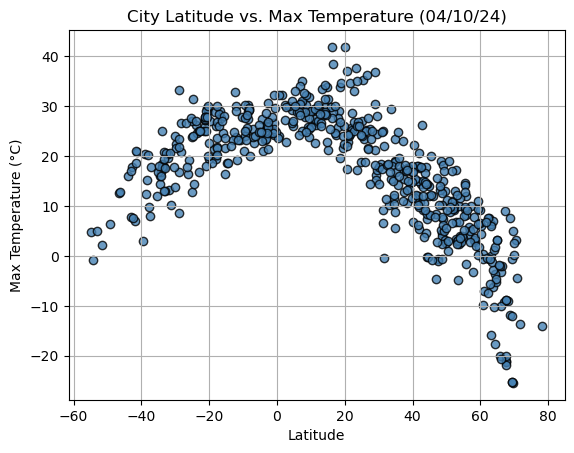

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            color = "steelblue", 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  # Usando la fecha actual para el título
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/haririvera/Desktop/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

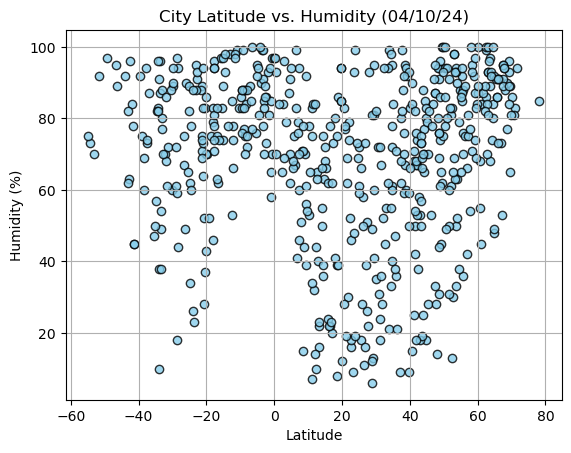

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            color = "skyblue", 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Usando la fecha actual para el título
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/haririvera/Desktop/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

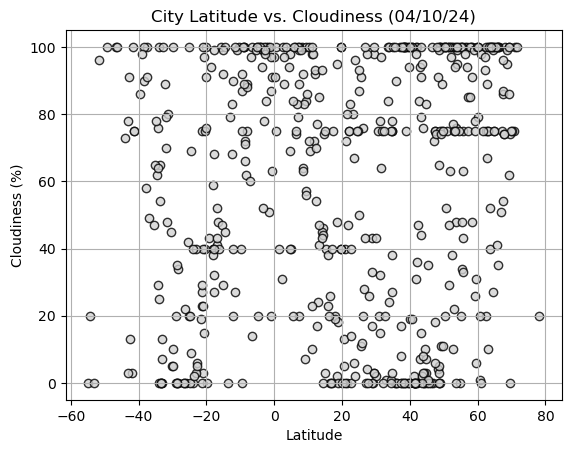

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            color = "lightgray", 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Añadiendo la fecha actual al título
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/haririvera/Desktop/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

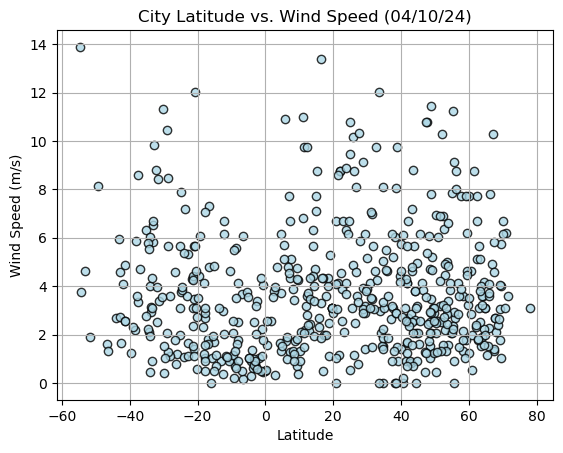

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            color = "lightblue", 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Usando la fecha actual para el título
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/haririvera/Desktop/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values,"r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()
    
    print(f"The value of r squared is: {rvalue**2}")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vostochnyy,55.8167,37.8667,11.99,76,43,2.69,RU,1712728213
2,hamilton,39.1834,-84.5333,14.67,92,100,0.89,US,1712728804
4,olonkinbyen,70.9221,-8.7187,-4.41,83,100,6.19,SJ,1712728804
6,talnakh,69.4865,88.3972,-25.44,89,74,5.76,RU,1712728214
8,nishinoomote,30.7333,131.0000,18.31,72,75,4.12,JP,1712728409


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,2.23,92,96,1.90,CL,1712728804
3,papatowai,-46.5619,169.4708,12.51,95,100,1.61,NZ,1712728804
5,hermanus,-34.4187,19.2345,14.33,83,76,2.10,ZA,1712728409
7,port-aux-francais,-49.3500,70.2167,6.39,97,100,8.14,TF,1712728409
9,grytviken,-54.2811,-36.5092,-0.80,73,20,3.74,GS,1712728215


###  Temperature vs. Latitude Linear Regression Plot

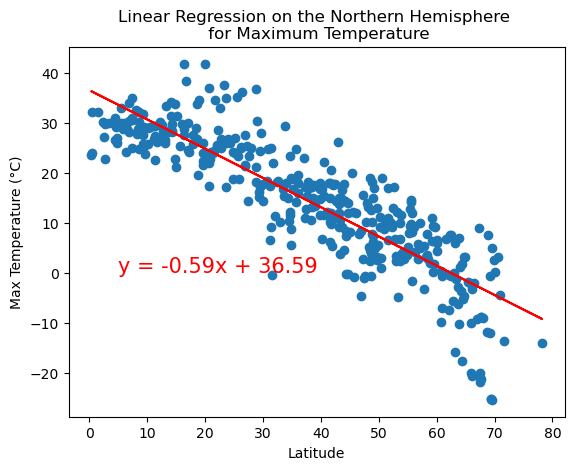

The value of r squared is: 0.7574631964469634


In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Max Temperature (°C)', 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       (5, 0))

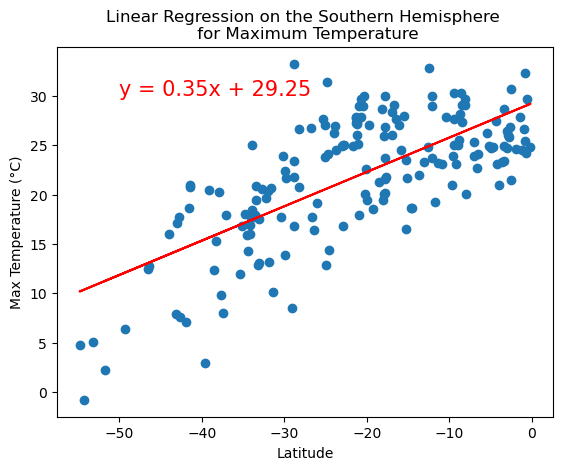

The value of r squared is: 0.5037664546119525


In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Max Temperature (°C)', 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       (-50, 30))

**Discussion about the linear relationship:** In the Northern Hemisphere, there's a strong negative relationship between latitude and maximum temperature, with an r-squared value of about 0.757. This means as you go further north, temperatures tend to drop significantly.

For the Southern Hemisphere, the relationship is positive with an r-squared value around 0.504, indicating that as cities move closer to the equator, temperatures tend to rise, but the correlation is less strong compared to the Northern Hemisphere. This suggests other factors might also influence temperatures in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

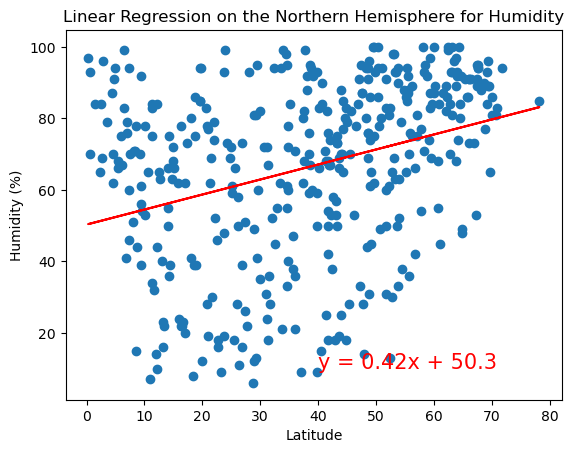

The value of r squared is: 0.10730178102481051


In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Humidity (%)', 
                       'Linear Regression on the Northern Hemisphere for Humidity', 
                       (40, 10))

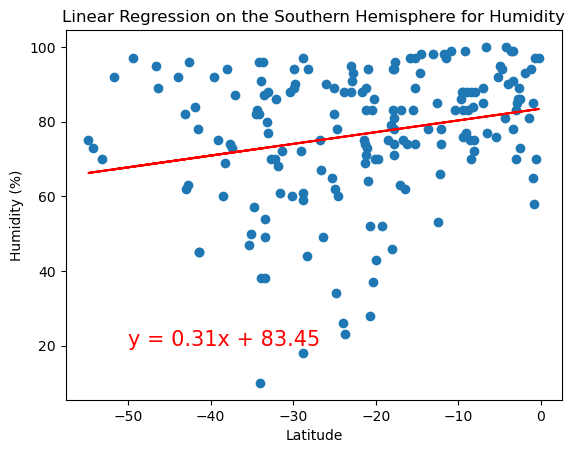

The value of r squared is: 0.054372077843940006


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Llamar a la función plot_linear_regression para generar el gráfico de regresión lineal
plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Humidity (%)', 
                       'Linear Regression on the Southern Hemisphere for Humidity', 
                       (-50, 20))

**Discussion about the linear relationship:** 
The results shows a weak positive relationship in both hemispheres. 

In the Northern Hemisphere, the r-squared value is approximately 0.107, indicating that only about 10.7% of the variation in humidity can be explained by latitude.

In the Southern Hemisphere, the relationship is even weaker, with an r-squared value of about 0.054, explaining only 5.4% of the variation. These low r-squared values suggest that factors other than latitude are more significant in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

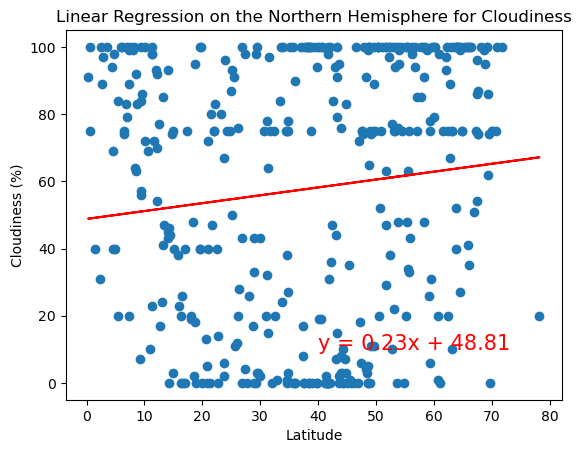

The value of r squared is: 0.014234505051575728


In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Cloudiness (%)', 
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 
                       (40, 10))

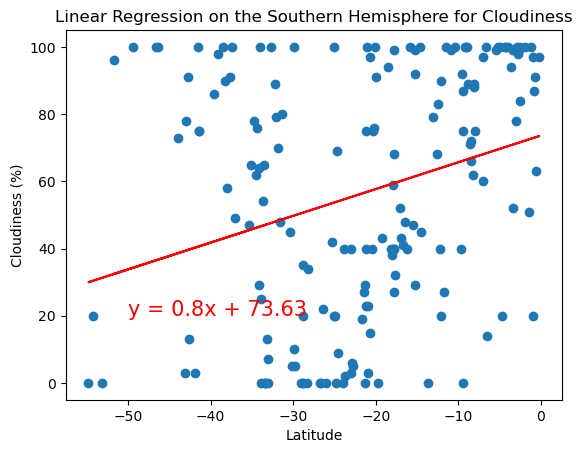

The value of r squared is: 0.08304837009483679


In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Cloudiness (%)', 
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 
                       (-50, 20))

**Discussion about the linear relationship:** 
The results shown for the Northern Hemisphere indicate a very weak positive relationship, with an r-squared value of about 0.014, suggesting that latitude barely influences cloudiness. 

In the Southern Hemisphere, the relationship is slightly stronger but still weak, with an r-squared value of approximately 0.083, meaning only 8.3% of the variation in cloudiness can be attributed to latitude. 

These low values imply that cloudiness is influenced by other factors much more than by latitude.

### Wind Speed vs. Latitude Linear Regression Plot

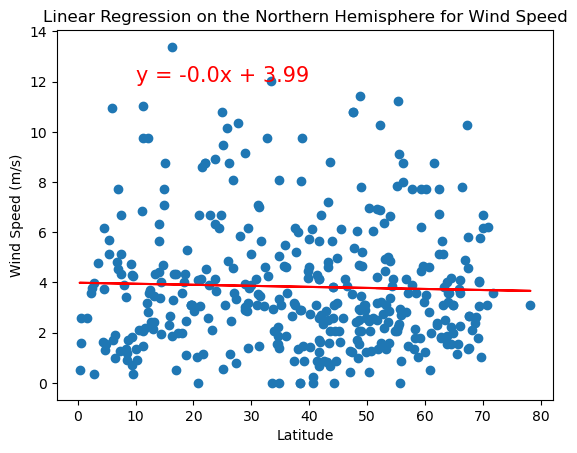

The value of r squared is: 0.0009988819655594027


In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       (10, 12))

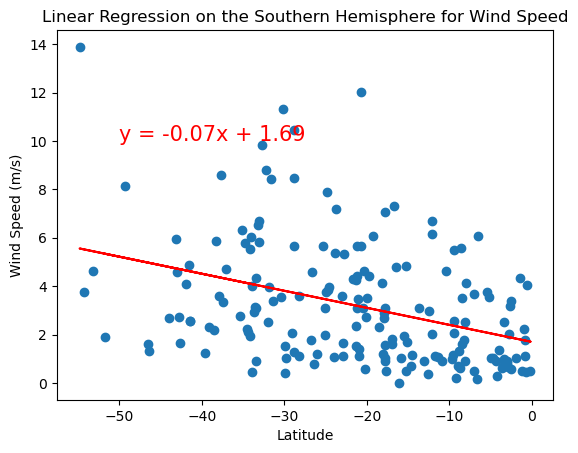

The value of r squared is: 0.1382889575441696


In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       (-50, 10))

**Discussion about the linear relationship:** The Northern Hemisphere data show a negligible negative relationship, with an r-squared value close to zero (0.00099), suggesting almost no linear correlation between these variables.

In contrast, the Southern Hemisphere exhibits a slightly stronger negative relationship, with an r-squared value of approximately 0.138. This indicates that only about 13.8% of the variation in wind speed can be explained by latitude, which is still not a very strong correlation, but suggests a minor trend of increasing wind speed closer to the equator.